#**Customer Churn Prediction using Machine Learning**
## End-to-End ML Project with Business Interpretation & Explainability
## 📌 Project Highlights
- Final Model: Tuned Gradient Boosting
- ROC-AUC: 0.845
- Recall (Churn Class): 0.63
- Threshold Optimized to 0.4
- SHAP Explainability Implemented


## **1️⃣ Business Problem Statement**

Customer churn directly impacts revenue and profitability.
Acquiring new customers is significantly more expensive than retaining existing ones.

The business requires a predictive system to:

- Identify customers at high risk of churn
- Enable proactive retention strategies
- Reduce revenue loss
- Improve customer lifetime value (CLV)

This project aims to develop a data-driven churn prediction system to support strategic retention decisions.


# **2️⃣Machine Learning Problem Formulation**


This problem is formulated as a supervised binary classification task.

- Input: Customer demographic, billing, and service usage attributes
- Output: Probability of churn (0–1)
- Target Variable: Churn (Yes / No)

The model will predict the likelihood that a customer will discontinue services.

# **3️⃣Type of ML Problem**

- Learning Type: Supervised Learning
- Task: Binary Classification
- Class Labels:
    - 0 → Customer Retained
    - 1 → Customer Churned

# **4️⃣Dataset Description**

The dataset contains customer-level information including:

### Customer Demographics
- Gender
- Senior Citizen
- Partner
- Dependents

### Service Information
- Internet Service Type
- Streaming Services
- Online Security
- Tech Support

### Contract & Billing Information
- Contract Type
- Monthly Charges
- Total Charges
- Payment Method

Each row represents a unique customer.

Target Variable:
- Churn → Indicates whether the customer left the service.

# **5️⃣ Key Challenges**

1. Class Imbalance  
   Only ~26% of customers have churned, creating imbalance in training data.

2. Mixed Data Types  
   Dataset contains numerical and categorical variables.

3. Business Trade-off  
   Missing a churner (False Negative) is more costly than a false alarm (False Positive).

4. Model Interpretability  
   Business stakeholders require explainable insights.

# **6️⃣ Evaluation Metrics**

Accuracy alone is insufficient due to class imbalance.

Primary Metrics Used:

- ROC-AUC → Measures model’s ability to distinguish churners vs non-churners.
- Recall (Churn Class) → Measures ability to identify actual churners.
- Precision → Measures reliability of churn predictions.

Why Recall is Important:
Failing to detect churn-prone customers leads to revenue loss.

# **7️⃣ Success Criteria**

The project aims to achieve:

- ROC-AUC ≥ 0.80
- Improved Recall compared to baseline Logistic Regression
- Business-aligned threshold optimization
- Explainable insights using SHAP
- Identification of key churn drivers

# **8️⃣ Expected Business Impact**


- Early detection of high-risk customers
- Data-driven retention campaigns
- Improved subscription retention rate
- Enhanced strategic decision-making

# **9️⃣ Project Roadmap**



1. Dataset Understanding
2. Exploratory Data Analysis
3. Data Cleaning
4. Feature Engineering
5. Baseline Modeling
6. Advanced Modeling & Hyperparameter Tuning
7. Threshold Optimization
8. Model Explainability using SHAP
9. Business Insight Generation

# Step 1: Mount Drive



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Installing Libs.

In [ ]:
!pip install shap streamlit


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Step 2: Basic Inspection

In [ ]:
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df['Churn'].value_counts()


,count
Churn,
No,5174
Yes,1869


In [ ]:
df['Churn'].value_counts(normalize=True)


,proportion
Churn,
No,0.73463
Yes,0.26537


In [ ]:
categorical_cols = df.select_dtypes(include='object').columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)


Categorical Columns: Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')
Numerical Columns: Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')


In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df['TotalCharges'].head()


,TotalCharges
0,29.85
1,1889.5
2,108.15
3,1840.75
4,151.65


**Observations:**

Dataset Size: 7,043 rows and 21 columns.

Target Distribution (Churn): Imbalanced — 73.46% No, 26.54% Yes.

**Data Types & Issues:**

TotalCharges is stored as object but represents numeric data; likely contains non-numeric entries (e.g., empty strings) and should be cleaned and converted.

No missing values reported, but TotalCharges may hide implicit missing values due to its type.

SeniorCitizen is int64 but functions as a binary categorical variable (0/1).

Most features (18/21) are categorical and will require encoding for modeling.


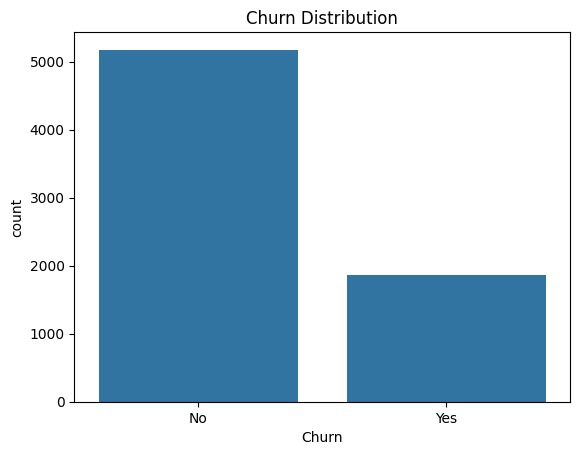

,proportion
Churn,
No,73.463013
Yes,26.536987


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()

df['Churn'].value_counts(normalize=True) * 100


**Approximately 26% of customers have churned, indicating a class imbalance.**

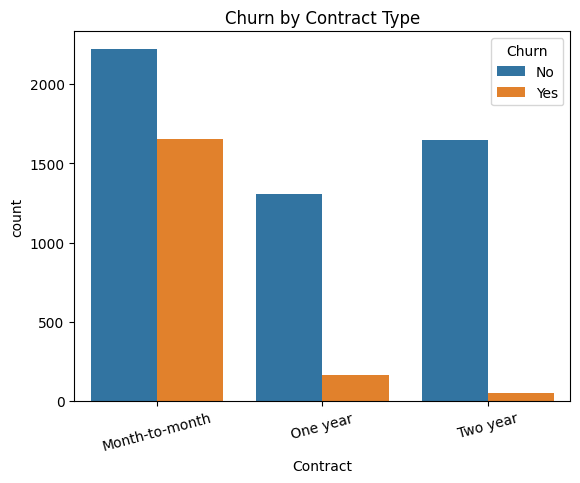

In [ ]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Churn by Contract Type")
plt.xticks(rotation=15)
plt.show()


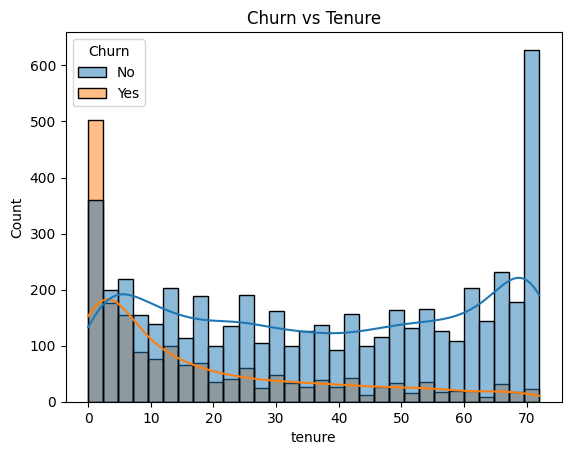

In [ ]:
sns.histplot(data=df, x='tenure', hue='Churn', bins=30, kde=True)
plt.title("Churn vs Tenure")
plt.show()

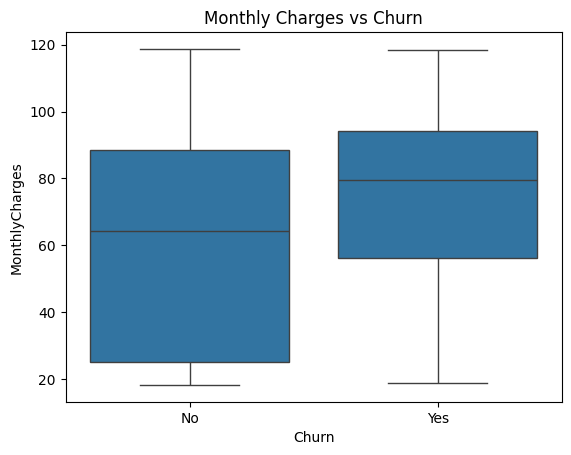

In [ ]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

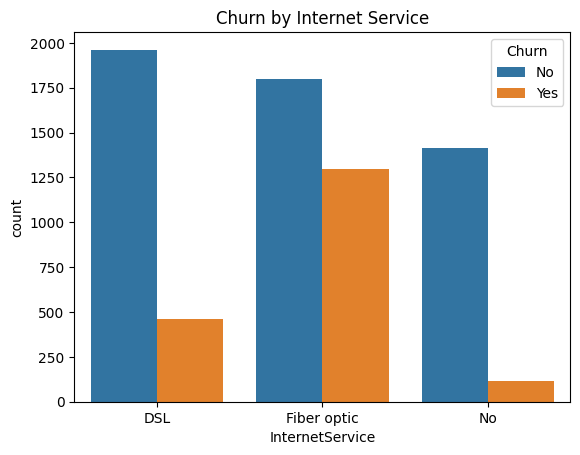

In [ ]:
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title("Churn by Internet Service")
plt.show()

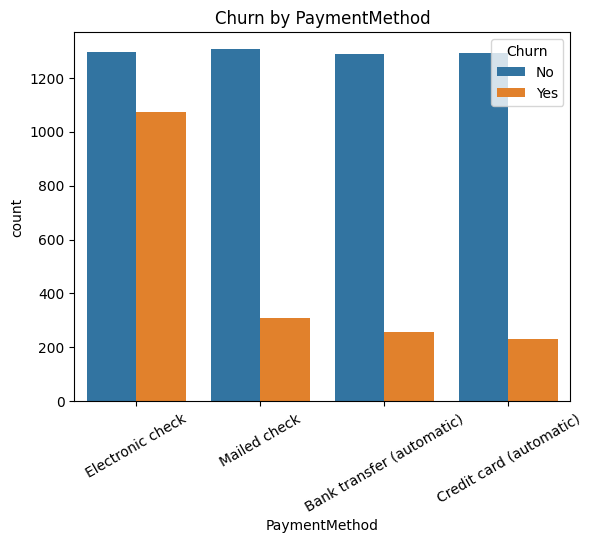

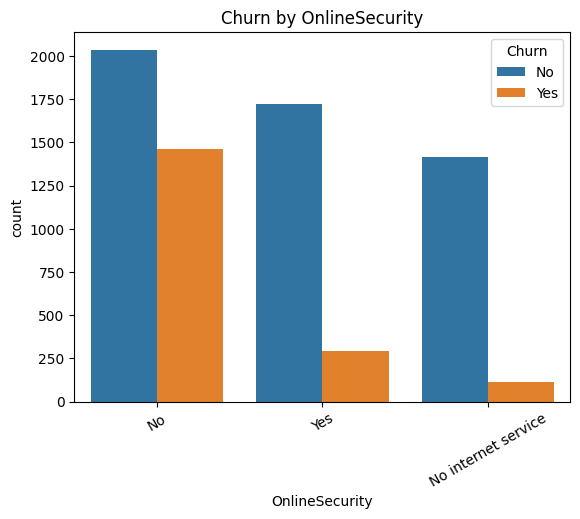

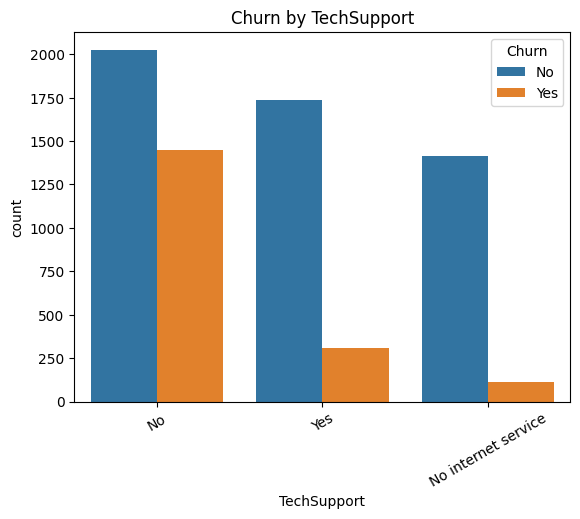

In [ ]:
cols = ['PaymentMethod', 'OnlineSecurity', 'TechSupport']

for col in cols:
    sns.countplot(x=col, hue='Churn', data=df)
    plt.xticks(rotation=30)
    plt.title(f"Churn by {col}")
    plt.show()

**Key Insights from EDA:**

Churn Rate: ~26% of customers have churned, indicating a minority (imbalanced) churn class.

Contract Type: Month-to-month contracts have the highest churn; longer-term contracts reduce churn.

Tenure: Newer customers are more likely to churn; churn decreases with longer tenure.

Monthly Charges: Higher monthly charges are associated with higher churn.

Internet Service: Fiber optic users show higher churn than DSL or no internet users.

Add-on Services: Lack of online security or tech support correlates with higher churn.

Payment Method: Electronic check users have higher churn than other payment methods.

# **Step 3: Data Cleaning**

In [ ]:
df_clean = df.copy()

In [ ]:
df_clean.drop(columns=['customerID'], inplace=True)

# Step 4: **Feature Engineering**

In [ ]:
X = df_clean.drop('Churn', axis=1)
y = df_clean['Churn']


In [ ]:
X.select_dtypes(include='object').columns


Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TotalCharges'],
      dtype='object')

**HOT-Encoding**

In [ ]:
X = pd.get_dummies(X, drop_first=True)


In [ ]:
X.shape


(7043, 6559)

**Scale Numerical Features**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


In [ ]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']


In [ ]:
X.columns


Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'gender_Male',
       'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic',
       ...
       'TotalCharges_995.35', 'TotalCharges_996.45', 'TotalCharges_996.85',
       'TotalCharges_996.95', 'TotalCharges_997.65', 'TotalCharges_997.75',
       'TotalCharges_998.1', 'TotalCharges_999.45', 'TotalCharges_999.8',
       'TotalCharges_999.9'],
      dtype='object', length=6559)

In [ ]:
'TotalCharges' in X.columns


False

In [ ]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']


In [ ]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns


In [ ]:
num_cols


Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])


In [ ]:
X.columns


Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'gender_Male',
       'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic',
       ...
       'TotalCharges_995.35', 'TotalCharges_996.45', 'TotalCharges_996.85',
       'TotalCharges_996.95', 'TotalCharges_997.65', 'TotalCharges_997.75',
       'TotalCharges_998.1', 'TotalCharges_999.45', 'TotalCharges_999.8',
       'TotalCharges_999.9'],
      dtype='object', length=6559)

In [ ]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns


In [ ]:
X[num_cols] = scaler.fit_transform(X[num_cols])


# Step 5: Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [ ]:
print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)


Training shape: (5634, 6559)
Testing shape: (1409, 6559)


In [ ]:
print("Train churn distribution:")
print(y_train.value_counts(normalize=True))

print("\nTest churn distribution:")
print(y_test.value_counts(normalize=True))


Train churn distribution:
Churn
No     0.734647
Yes    0.265353
Name: proportion, dtype: float64

Test churn distribution:
Churn
No     0.734564
Yes    0.265436
Name: proportion, dtype: float64


# STEP 6: **Baseline Model- Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


In [ ]:
log_model = LogisticRegression(max_iter=1000, random_state=42)

log_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
y_pred = log_model.predict(X_test)
y_prob = log_model.predict_proba(X_test)[:, 1]


In [ ]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          No       0.84      0.89      0.86      1035
         Yes       0.63      0.54      0.58       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.79      0.79      1409



In [ ]:
print(confusion_matrix(y_test, y_pred))


[[917 118]
 [171 203]]


In [ ]:
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)


ROC-AUC Score: 0.8403213722906818


**Converting Yes | No to 0 | 1**

In [ ]:
y_test


,Churn
437,No
2280,No
2235,No
4460,No
3761,No
...,...
5143,No
4439,No
3857,No
4758,No


In [ ]:
print(y_train.unique())
print(y_test.unique())


['No' 'Yes']
['No' 'Yes']


In [ ]:
y_train = y_train.map({'Yes': 1, 'No': 0})
y_test = y_test.map({'Yes': 1, 'No': 0})


In [ ]:
print(y_train.unique())
print(y_test.unique())


[0 1]
[0 1]


**ROC Curve**

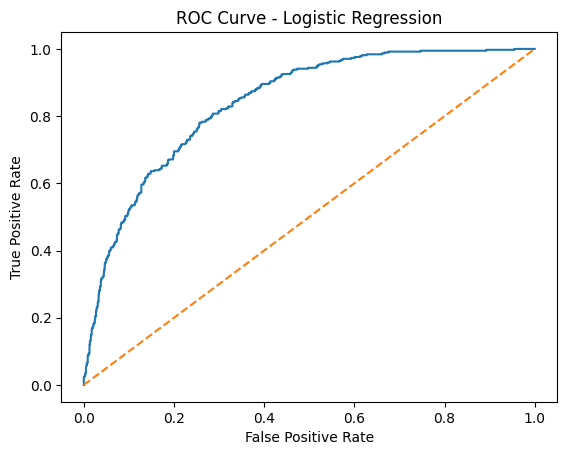

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.show()


Baseline Model Results (Logistic Regression)

ROC-AUC: 0.84

Recall (Churn Class): 0.54

Precision (Churn Class): 0.63

# **STEP 7: Random Forest (Non-Linear Boost)**

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf_model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]


In [ ]:
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
print("Random Forest ROC-AUC:", roc_auc_rf)


              precision    recall  f1-score   support

           0       0.82      0.91      0.87      1035
           1       0.66      0.46      0.54       374

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409

[[945  90]
 [202 172]]
Random Forest ROC-AUC: 0.8296778526957556


class_weight adjustment

In [ ]:
rf_model_balanced = RandomForestClassifier(
    n_estimators=300,
    class_weight='balanced',
    random_state=42
)

rf_model_balanced.fit(X_train, y_train)

y_pred_rf_bal = rf_model_balanced.predict(X_test)
y_prob_rf_bal = rf_model_balanced.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_rf_bal))
print(confusion_matrix(y_test, y_pred_rf_bal))

roc_auc_rf_bal = roc_auc_score(y_test, y_prob_rf_bal)
print("Balanced RF ROC-AUC:", roc_auc_rf_bal)


              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.64      0.50      0.56       374

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409

[[930 105]
 [186 188]]
Balanced RF ROC-AUC: 0.8301041101552611


In [ ]:
y_pred_custom = (y_prob_rf_bal >= 0.4).astype(int)
print(classification_report(y_test, y_pred_custom))


              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1035
           1       0.59      0.62      0.61       374

    accuracy                           0.79      1409
   macro avg       0.73      0.73      0.73      1409
weighted avg       0.79      0.79      0.79      1409



# **STEP 8: Gradient Boosting (XGBoost-level performance)**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)

gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)
y_prob_gb = gb_model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_gb))
print(confusion_matrix(y_test, y_pred_gb))

roc_auc_gb = roc_auc_score(y_test, y_prob_gb)
print("Gradient Boosting ROC-AUC:", roc_auc_gb)


              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1035
           1       0.65      0.48      0.55       374

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409

[[937  98]
 [193 181]]
Gradient Boosting ROC-AUC: 0.8451083727298561


In [ ]:
y_pred_gb_custom = (y_prob_gb >= 0.4).astype(int)

print(classification_report(y_test, y_pred_gb_custom))
print(confusion_matrix(y_test, y_pred_gb_custom))


              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1035
           1       0.60      0.63      0.62       374

    accuracy                           0.79      1409
   macro avg       0.73      0.74      0.74      1409
weighted avg       0.79      0.79      0.79      1409

[[880 155]
 [139 235]]


# **STEP 9: Feature Importance**

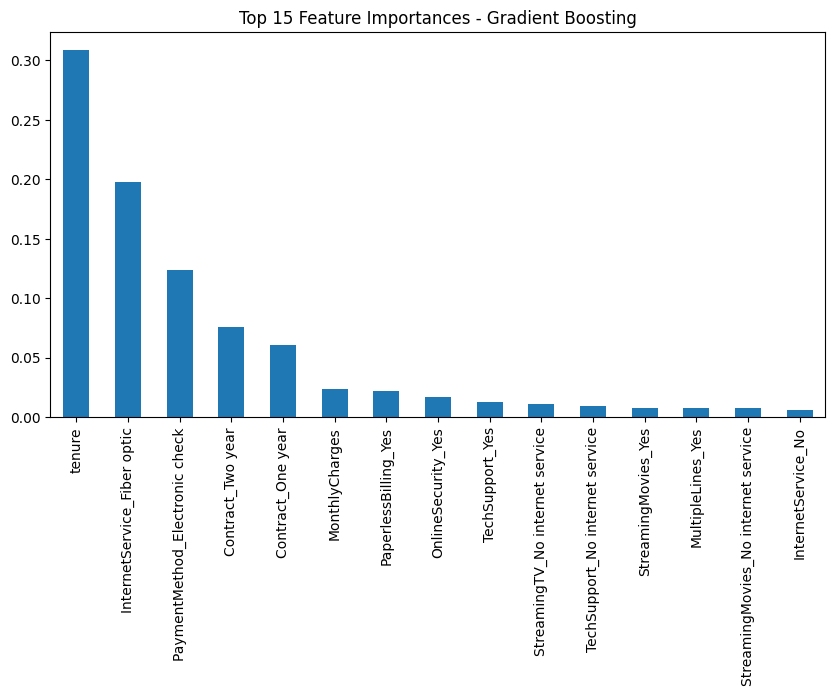

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importance = pd.Series(
    gb_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance.head(15).plot(kind='bar', figsize=(10,5))
plt.title("Top 15 Feature Importances - Gradient Boosting")
plt.show()


**📌 Final Model Summary**

Final Model: **Gradient Boosting Classifier**

ROC-AUC: 0.845

Recall (Churn Class): 0.63

Precision (Churn Class): 0.60

Threshold optimized to 0.4


**Key Drivers of Churn:**

Short tenure customers

Fiber optic service users

Electronic check payment method

Month-to-month contracts

In [ ]:
import joblib

joblib.dump(gb_model, "churn_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0]
}


In [69]:
gb_base = GradientBoostingClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=gb_base,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)



Fitting 3 folds for each of 54 candidates, totalling 162 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring='roc_auc', verbose=1)

In [70]:
print("Best Parameters:", grid_search.best_params_)
print("Best CV ROC-AUC:", grid_search.best_score_)


Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Best CV ROC-AUC: 0.8493152885169951


In [71]:
best_gb = grid_search.best_estimator_

y_prob_best = best_gb.predict_proba(X_test)[:, 1]
y_pred_best = (y_prob_best >= 0.4).astype(int)

print(classification_report(y_test, y_pred_best))
print("Tuned GB ROC-AUC:", roc_auc_score(y_test, y_prob_best))


              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1035
           1       0.61      0.63      0.62       374

    accuracy                           0.79      1409
   macro avg       0.74      0.74      0.74      1409
weighted avg       0.80      0.79      0.80      1409

Tuned GB ROC-AUC: 0.845271125578031


In [72]:
!pip install shap


In [73]:
import shap

shap.initjs()

best_gb = grid_search.best_estimator_

explainer = shap.TreeExplainer(best_gb)
shap_values = explainer.shap_values(X_test)


In [74]:
%whos


Variable                     Type                          Data/Info
--------------------------------------------------------------------
GradientBoostingClassifier   ABCMeta                       <class 'sklearn.ensemble.<...>dientBoostingClassifier'>
GridSearchCV                 ABCMeta                       <class 'sklearn.model_sel<...>on._search.GridSearchCV'>
LogisticRegression           type                          <class 'sklearn.linear_mo<...>stic.LogisticRegression'>
RandomForestClassifier       ABCMeta                       <class 'sklearn.ensemble.<...>.RandomForestClassifier'>
StandardScaler               type                          <class 'sklearn.preproces<...>ng._data.StandardScaler'>
X                            DataFrame                           SeniorCitizen    te<...>7043 rows x 6559 columns]
X_test                       DataFrame                           SeniorCitizen    te<...>1409 rows x 6559 columns]
X_train                      DataFrame                   

In [75]:
explainer = shap.TreeExplainer(best_gb)
shap_values = explainer.shap_values(X_test)


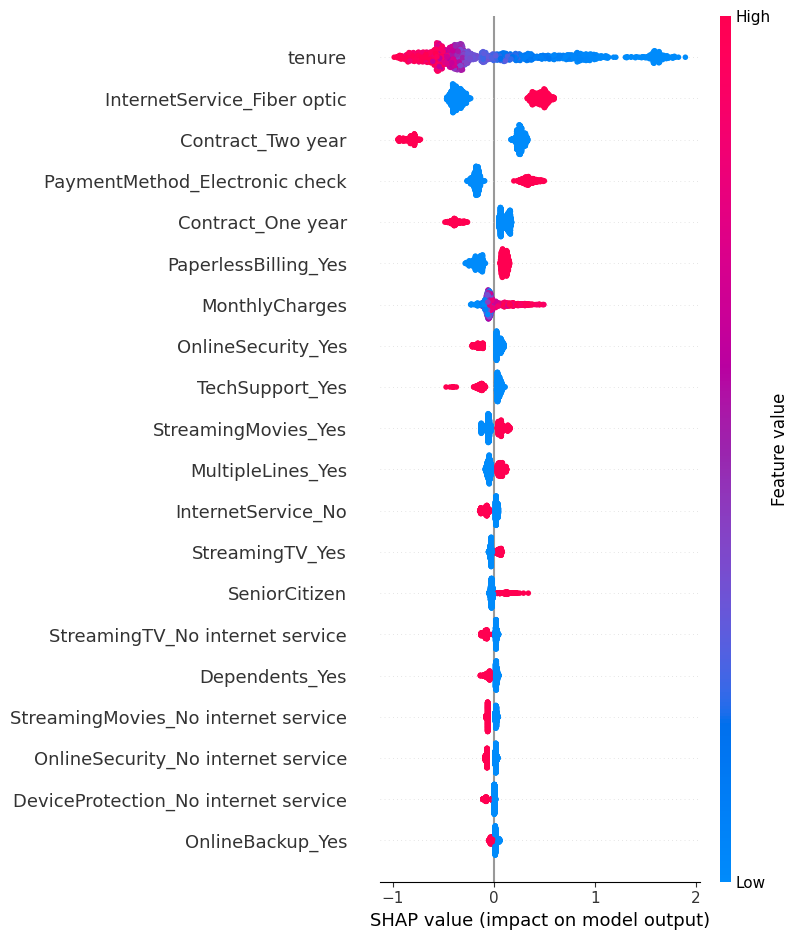

In [76]:
shap.summary_plot(shap_values, X_test)


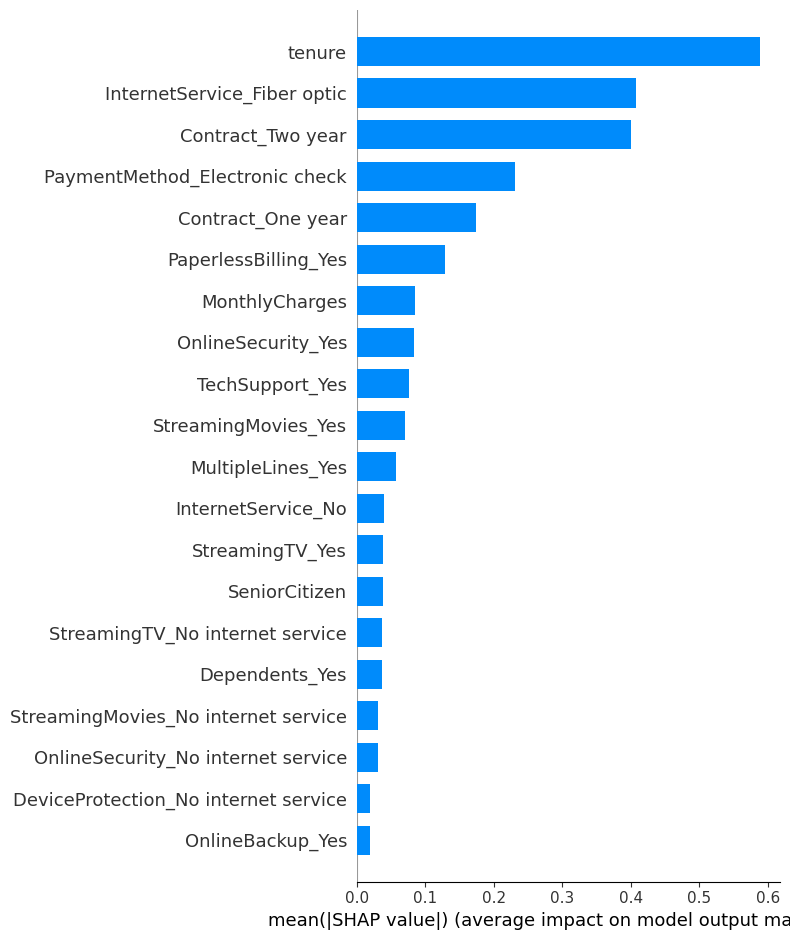

In [77]:
shap.summary_plot(shap_values, X_test, plot_type="bar")


In [78]:
shap.initjs()
shap.force_plot(
    explainer.expected_value,
    shap_values[0],
    X_test.iloc[0]
)


**📊 SHAP Global Insights (Summary Plot)**

🥇 Top 3 Drivers of Churn

**1️⃣ tenure (Strongest)**

Low tenure (red on left side) → pushes churn probability UP

High tenure (blue on right) → pushes churn probability DOWN

**💡 Interpretation:**

New customers are highest churn risk.
Customer loyalty builds over time.

**2️⃣ InternetService_Fiber optic**

Having fiber optic → increases churn probability

No fiber → reduces churn

**💡 Interpretation:**

Fiber customers may have higher expectations or higher cost sensitivity.

**3️⃣ Contract_Two year / One year**

Long-term contracts push prediction toward NON-churn

Month-to-month pushes toward churn

**💡 Interpretation:**

Long-term commitment is protective.

**Implemented SHAP-based explainability for global and individual-level churn insights**

**Identified tenure and contract type as strongest churn drivers**

**Demonstrated customer-level risk decomposition**

In [79]:
import joblib

joblib.dump(best_gb, "final_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']